In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
#from linear_algebra import distance, vector_subtract, scalar_multiply

#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))




In [4]:
from functools import reduce
import math, random

import numpy as np
import matplotlib.pyplot as plt

%pylab inline

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

vector = [i for i in range(10)]
sum_of_squares(vector)

np.sum(np.square(vector))

Populating the interactive namespace from numpy and matplotlib


C:\Users\youngjoo\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


285

285

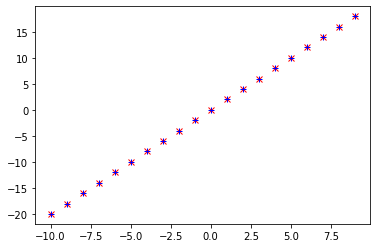

In [6]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

def plot_estimated_derivative():
    def square(x):
        return x * x

    def derivative(x):
        return 2 * x

    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

    # plot to show they're basically the same
    x = range(-10,10)
    plt.plot(x, list(map(derivative, x)), 'rx')           # red  x
    plt.plot(x, list(map(derivative_estimate, x)), 'b+')  # blue +
    plt.show()                                      # purple *, hopefully

plot_estimated_derivative()

In [7]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

In [8]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# 임의의 시작점을 선택
v = [random.randint(-10,10) for i in range(3)]
tolerance = 0.0000001   # 아주 작은 e값

while True:
    #print v, sum_of_squares(v)
    gradient = sum_of_squares_gradient(v)   # compute the gradient at v
    next_v = step(v, gradient, -0.0001)     # take a negative gradient step
    if distance(next_v, v) < tolerance:     # stop if we're converging
        break
    v = next_v                              # continue if we're not
    #print(v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))

C:\Users\youngjoo\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


minimum v [0.00015616481132465262, 0.00046849443397396654, 7.808240566232631e-05]
minimum value 2.4997134503466775e-07


In [9]:
# Using gradient descent to fit models

def gradient_step(v, gradient, step_size):
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
print(inputs)

#def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
def linear_gradient(x, y, theta):
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915), (-45, -895), (-44, -875), (-43, -855), (-42, -835), (-41, -815), (-40, -795), (-39, -775), (-38, -755), (-37, -735), (-36, -715), (-35, -695), (-34, -675), (-33, -655), (-32, -635), (-31, -615), (-30, -595), (-29, -575), (-28, -555), (-27, -535), (-26, -515), (-25, -495), (-24, -475), (-23, -455), (-22, -435), (-21, -415), (-20, -395), (-19, -375), (-18, -355), (-17, -335), (-16, -315), (-15, -295), (-14, -275), (-13, -255), (-12, -235), (-11, -215), (-10, -195), (-9, -175), (-8, -155), (-7, -135), (-6, -115), (-5, -95), (-4, -75), (-3, -55), (-2, -35), (-1, -15), (0, 5), (1, 25), (2, 45), (3, 65), (4, 85), (5, 105), (6, 125), (7, 145), (8, 165), (9, 185), (10, 205), (11, 225), (12, 245), (13, 265), (14, 285), (15, 305), (16, 325), (17, 345), (18, 365), (19, 385), (20, 405), (21, 425), (22, 445), (23, 465), (24, 485), (25, 505), (26, 525), (27, 545), (28, 565), (29, 585), (30, 605), (31, 625), (32, 645), (33, 665), (34, 

In [12]:
#from linear_algebra import vector_mean
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

# Start with random values for slope and intercept


theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = .001

for epoch in range(5000):
    # Computer the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [32.80011317  0.31774902]
1 [11.45764227  0.33991363]
2 [25.69309252  0.34069145]
3 [16.19804798  0.35570316]
4 [22.5312577  0.3611898]
5 [18.3070123   0.37299867]
6 [21.12459579  0.38055969]
7 [19.24527517  0.39092317]
8 [20.49879239  0.3993866 ]
9 [19.66270486  0.40908661]
10 [20.22038494  0.41793115]
11 [19.84842117  0.42731567]
12 [20.09653039  0.43630946]
13 [19.93105054  0.44553337]
14 [20.04143482  0.45457335]
15 [19.96781755  0.46370564]
16 [20.0169294   0.47274605]
17 [19.98418083  0.48181749]
18 [20.0060332   0.49083803]
19 [19.99146669  0.49986239]
20 [20.00119158  0.50885413]
21 [19.99471407  0.51783761]
22 [19.99904355  0.52679665]
23 [19.99616475  0.5357421 ]
24 [19.99809386  0.54466678]
25 [19.99681607  0.55357554]
26 [19.99767726  0.56246521]
27 [19.99711173  0.57133796]
28 [19.99749781  0.58019239]
29 [19.99724915  0.5890295 ]
30 [19.99742385  0.59784869]
31 [19.99731614  0.60665042]
32 [19.99739678  0.61543444]
33 [19.99735178  0.62420096]
34 [19.99739056  0.6329499

494 [19.99895542  3.26076851]
495 [19.99895751  3.26424593]
496 [19.99895959  3.26771639]
497 [19.99896167  3.27117992]
498 [19.99896375  3.27463652]
499 [19.99896582  3.27808621]
500 [19.99896789  3.28152901]
501 [19.99896995  3.28496492]
502 [19.99897201  3.28839396]
503 [19.99897406  3.29181614]
504 [19.99897612  3.29523148]
505 [19.99897816  3.29864   ]
506 [19.99898021  3.30204169]
507 [19.99898224  3.30543659]
508 [19.99898428  3.3088247 ]
509 [19.99898631  3.31220604]
510 [19.99898834  3.31558061]
511 [19.99899036  3.31894844]
512 [19.99899238  3.32230953]
513 [19.99899439  3.3256639 ]
514 [19.9989964   3.32901157]
515 [19.99899841  3.33235254]
516 [19.99900041  3.33568684]
517 [19.99900241  3.33901446]
518 [19.99900441  3.34233544]
519 [19.9990064   3.34564977]
520 [19.99900838  3.34895748]
521 [19.99901037  3.35225857]
522 [19.99901234  3.35555306]
523 [19.99901432  3.35884097]
524 [19.99901629  3.3621223 ]
525 [19.99901826  3.36539707]
526 [19.99902022  3.3686653 ]
527 [19.99

786 [19.99941771  4.03049118]
787 [19.99941888  4.03242962]
788 [19.99942004  4.03436418]
789 [19.9994212   4.03629487]
790 [19.99942236  4.0382217 ]
791 [19.99942351  4.04014468]
792 [19.99942466  4.04206381]
793 [19.99942581  4.04397911]
794 [19.99942696  4.04589058]
795 [19.99942811  4.04779822]
796 [19.99942925  4.04970206]
797 [19.99943039  4.05160208]
798 [19.99943153  4.05349831]
799 [19.99943267  4.05539074]
800 [19.9994338   4.05727939]
801 [19.99943493  4.05916427]
802 [19.99943606  4.06104538]
803 [19.99943719  4.06292272]
804 [19.99943832  4.06479631]
805 [19.99943944  4.06666616]
806 [19.99944056  4.06853227]
807 [19.99944168  4.07039464]
808 [19.99944279  4.07225329]
809 [19.99944391  4.07410823]
810 [19.99944502  4.07595946]
811 [19.99944613  4.07780698]
812 [19.99944724  4.07965082]
813 [19.99944834  4.08149096]
814 [19.99944945  4.08332743]
815 [19.99945055  4.08516022]
816 [19.99945165  4.08698935]
817 [19.99945274  4.08881483]
818 [19.99945384  4.09063665]
819 [19.99

1069 [19.99966951  4.44973877]
1070 [19.99967017  4.45083896]
1071 [19.99967083  4.45193696]
1072 [19.99967149  4.45303275]
1073 [19.99967215  4.45412636]
1074 [19.9996728   4.45521778]
1075 [19.99967346  4.45630702]
1076 [19.99967411  4.45739408]
1077 [19.99967476  4.45847896]
1078 [19.99967541  4.45956168]
1079 [19.99967606  4.46064223]
1080 [19.99967671  4.46172062]
1081 [19.99967736  4.46279686]
1082 [19.999678    4.46387094]
1083 [19.99967864  4.46494288]
1084 [19.99967929  4.46601267]
1085 [19.99967993  4.46708032]
1086 [19.99968057  4.46814584]
1087 [19.99968121  4.46920923]
1088 [19.99968184  4.4702705 ]
1089 [19.99968248  4.47132964]
1090 [19.99968312  4.47238666]
1091 [19.99968375  4.47344157]
1092 [19.99968438  4.47449437]
1093 [19.99968501  4.47554507]
1094 [19.99968564  4.47659366]
1095 [19.99968627  4.47764016]
1096 [19.9996869   4.47868456]
1097 [19.99968752  4.47972688]
1098 [19.99968815  4.48076712]
1099 [19.99968877  4.48180527]
1100 [19.99968939  4.48284135]
1101 [19

1372 [19.99981979  4.69994414]
1373 [19.99982015  4.70054407]
1374 [19.99982051  4.7011428 ]
1375 [19.99982087  4.70174034]
1376 [19.99982122  4.70233668]
1377 [19.99982158  4.70293183]
1378 [19.99982194  4.70352578]
1379 [19.99982229  4.70411855]
1380 [19.99982265  4.70471014]
1381 [19.999823    4.70530054]
1382 [19.99982336  4.70588976]
1383 [19.99982371  4.70647781]
1384 [19.99982406  4.70706468]
1385 [19.99982441  4.70765037]
1386 [19.99982477  4.70823489]
1387 [19.99982512  4.70881825]
1388 [19.99982547  4.70940044]
1389 [19.99982581  4.70998146]
1390 [19.99982616  4.71056132]
1391 [19.99982651  4.71114003]
1392 [19.99982686  4.71171757]
1393 [19.9998272   4.71229397]
1394 [19.99982755  4.71286921]
1395 [19.99982789  4.71344329]
1396 [19.99982824  4.71401624]
1397 [19.99982858  4.71458803]
1398 [19.99982892  4.71515868]
1399 [19.99982927  4.7157282 ]
1400 [19.99982961  4.71629657]
1401 [19.99982995  4.71686381]
1402 [19.99983029  4.71742991]
1403 [19.99983063  4.71799488]
1404 [19

1719 [19.99991001  4.85017281]
1720 [19.99991019  4.85047237]
1721 [19.99991037  4.85077134]
1722 [19.99991055  4.85106971]
1723 [19.99991073  4.85136748]
1724 [19.99991091  4.85166465]
1725 [19.99991109  4.85196124]
1726 [19.99991127  4.85225723]
1727 [19.99991144  4.85255262]
1728 [19.99991162  4.85284743]
1729 [19.9999118   4.85314164]
1730 [19.99991197  4.85343527]
1731 [19.99991215  4.85372831]
1732 [19.99991232  4.85402077]
1733 [19.9999125   4.85431264]
1734 [19.99991268  4.85460393]
1735 [19.99991285  4.85489463]
1736 [19.99991302  4.85518476]
1737 [19.9999132  4.8554743]
1738 [19.99991337  4.85576326]
1739 [19.99991354  4.85605165]
1740 [19.99991372  4.85633946]
1741 [19.99991389  4.8566267 ]
1742 [19.99991406  4.85691336]
1743 [19.99991423  4.85719944]
1744 [19.99991441  4.85748496]
1745 [19.99991458  4.8577699 ]
1746 [19.99991475  4.85805428]
1747 [19.99991492  4.85833809]
1748 [19.99991509  4.85862132]
1749 [19.99991526  4.858904  ]
1750 [19.99991543  4.8591861 ]
1751 [19.9

2255 [19.99996922  4.94874918]
2256 [19.99996928  4.94885165]
2257 [19.99996934  4.94895391]
2258 [19.9999694   4.94905597]
2259 [19.99996946  4.94915783]
2260 [19.99996953  4.94925949]
2261 [19.99996959  4.94936094]
2262 [19.99996965  4.94946218]
2263 [19.99996971  4.94956323]
2264 [19.99996977  4.94966407]
2265 [19.99996983  4.94976471]
2266 [19.99996989  4.94986515]
2267 [19.99996995  4.94996539]
2268 [19.99997001  4.95006543]
2269 [19.99997007  4.95016527]
2270 [19.99997013  4.95026491]
2271 [19.99997019  4.95036435]
2272 [19.99997025  4.95046359]
2273 [19.99997031  4.95056264]
2274 [19.99997037  4.95066148]
2275 [19.99997043  4.95076013]
2276 [19.99997049  4.95085858]
2277 [19.99997054  4.95095683]
2278 [19.9999706   4.95105489]
2279 [19.99997066  4.95115275]
2280 [19.99997072  4.95125042]
2281 [19.99997078  4.95134789]
2282 [19.99997084  4.95144516]
2283 [19.9999709   4.95154224]
2284 [19.99997095  4.95163913]
2285 [19.99997101  4.95173582]
2286 [19.99997107  4.95183232]
2287 [19

2748 [19.99998852  4.98089326]
2749 [19.99998855  4.98093146]
2750 [19.99998857  4.98096959]
2751 [19.99998859  4.98100764]
2752 [19.99998862  4.98104561]
2753 [19.99998864  4.98108351]
2754 [19.99998866  4.98112133]
2755 [19.99998868  4.98115908]
2756 [19.99998871  4.98119675]
2757 [19.99998873  4.98123434]
2758 [19.99998875  4.98127186]
2759 [19.99998877  4.98130931]
2760 [19.9999888   4.98134668]
2761 [19.99998882  4.98138397]
2762 [19.99998884  4.98142119]
2763 [19.99998886  4.98145834]
2764 [19.99998889  4.98149541]
2765 [19.99998891  4.98153241]
2766 [19.99998893  4.98156934]
2767 [19.99998895  4.98160619]
2768 [19.99998897  4.98164296]
2769 [19.999989    4.98167966]
2770 [19.99998902  4.98171629]
2771 [19.99998904  4.98175285]
2772 [19.99998906  4.98178933]
2773 [19.99998908  4.98182574]
2774 [19.99998911  4.98186208]
2775 [19.99998913  4.98189835]
2776 [19.99998915  4.98193454]
2777 [19.99998917  4.98197066]
2778 [19.99998919  4.98200671]
2779 [19.99998921  4.98204268]
2780 [19

3195 [19.99999531  4.99218992]
3196 [19.99999532  4.99220554]
3197 [19.99999533  4.99222112]
3198 [19.99999534  4.99223668]
3199 [19.99999535  4.9922522 ]
3200 [19.99999536  4.99226769]
3201 [19.99999537  4.99228315]
3202 [19.99999537  4.99229858]
3203 [19.99999538  4.99231398]
3204 [19.99999539  4.99232934]
3205 [19.9999954   4.99234468]
3206 [19.99999541  4.99235999]
3207 [19.99999542  4.99237526]
3208 [19.99999543  4.99239051]
3209 [19.99999544  4.99240572]
3210 [19.99999545  4.9924209 ]
3211 [19.99999546  4.99243606]
3212 [19.99999547  4.99245118]
3213 [19.99999548  4.99246627]
3214 [19.99999548  4.99248134]
3215 [19.99999549  4.99249637]
3216 [19.9999955   4.99251137]
3217 [19.99999551  4.99252635]
3218 [19.99999552  4.99254129]
3219 [19.99999553  4.9925562 ]
3220 [19.99999554  4.99257108]
3221 [19.99999555  4.99258594]
3222 [19.99999556  4.99260076]
3223 [19.99999556  4.99261556]
3224 [19.99999557  4.99263032]
3225 [19.99999558  4.99264506]
3226 [19.99999559  4.99265976]
3227 [19

3666 [19.99999817  4.99695727]
3667 [19.99999818  4.99696335]
3668 [19.99999818  4.99696943]
3669 [19.99999818  4.99697548]
3670 [19.99999819  4.99698153]
3671 [19.99999819  4.99698757]
3672 [19.99999819  4.99699359]
3673 [19.9999982  4.9969996]
3674 [19.9999982  4.9970056]
3675 [19.99999821  4.99701159]
3676 [19.99999821  4.99701756]
3677 [19.99999821  4.99702353]
3678 [19.99999822  4.99702948]
3679 [19.99999822  4.99703542]
3680 [19.99999822  4.99704134]
3681 [19.99999823  4.99704726]
3682 [19.99999823  4.99705316]
3683 [19.99999823  4.99705905]
3684 [19.99999824  4.99706493]
3685 [19.99999824  4.9970708 ]
3686 [19.99999824  4.99707666]
3687 [19.99999825  4.9970825 ]
3688 [19.99999825  4.99708834]
3689 [19.99999825  4.99709416]
3690 [19.99999826  4.99709997]
3691 [19.99999826  4.99710577]
3692 [19.99999827  4.99711155]
3693 [19.99999827  4.99711733]
3694 [19.99999827  4.99712309]
3695 [19.99999828  4.99712884]
3696 [19.99999828  4.99713459]
3697 [19.99999828  4.99714031]
3698 [19.999

4160 [19.99999932  4.99886791]
4161 [19.99999932  4.99887018]
4162 [19.99999932  4.99887244]
4163 [19.99999932  4.99887469]
4164 [19.99999933  4.99887694]
4165 [19.99999933  4.99887919]
4166 [19.99999933  4.99888143]
4167 [19.99999933  4.99888366]
4168 [19.99999933  4.99888589]
4169 [19.99999933  4.99888812]
4170 [19.99999933  4.99889035]
4171 [19.99999933  4.99889256]
4172 [19.99999934  4.99889478]
4173 [19.99999934  4.99889699]
4174 [19.99999934  4.99889919]
4175 [19.99999934  4.99890139]
4176 [19.99999934  4.99890359]
4177 [19.99999934  4.99890578]
4178 [19.99999934  4.99890797]
4179 [19.99999935  4.99891015]
4180 [19.99999935  4.99891233]
4181 [19.99999935  4.99891451]
4182 [19.99999935  4.99891668]
4183 [19.99999935  4.99891884]
4184 [19.99999935  4.99892101]
4185 [19.99999935  4.99892316]
4186 [19.99999935  4.99892532]
4187 [19.99999936  4.99892746]
4188 [19.99999936  4.99892961]
4189 [19.99999936  4.99893175]
4190 [19.99999936  4.99893389]
4191 [19.99999936  4.99893602]
4192 [19

4667 [19.99999975  4.99958961]
4668 [19.99999975  4.99959043]
4669 [19.99999975  4.99959125]
4670 [19.99999975  4.99959207]
4671 [19.99999976  4.99959288]
4672 [19.99999976  4.9995937 ]
4673 [19.99999976  4.99959451]
4674 [19.99999976  4.99959532]
4675 [19.99999976  4.99959613]
4676 [19.99999976  4.99959694]
4677 [19.99999976  4.99959774]
4678 [19.99999976  4.99959855]
4679 [19.99999976  4.99959935]
4680 [19.99999976  4.99960015]
4681 [19.99999976  4.99960095]
4682 [19.99999976  4.99960175]
4683 [19.99999976  4.99960254]
4684 [19.99999976  4.99960334]
4685 [19.99999976  4.99960413]
4686 [19.99999976  4.99960492]
4687 [19.99999976  4.99960571]
4688 [19.99999976  4.9996065 ]
4689 [19.99999976  4.99960729]
4690 [19.99999976  4.99960807]
4691 [19.99999977  4.99960886]
4692 [19.99999977  4.99960964]
4693 [19.99999977  4.99961042]
4694 [19.99999977  4.9996112 ]
4695 [19.99999977  4.99961198]
4696 [19.99999977  4.99961275]
4697 [19.99999977  4.99961353]
4698 [19.99999977  4.9996143 ]
4699 [19

In [13]:
# Minibatch and Stochastic Gradient Descent
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.10949138 -4.57569281]
1 [20.12044593 -4.3724311 ]
2 [20.26990832 -4.30439813]
3 [19.63720977 -4.16020123]
4 [20.31703283 -3.98941546]
5 [15.91340509 -3.75419895]
6 [19.17340066 -3.74370174]
7 [20.35465107 -3.75014334]
8 [19.69872502 -3.55679   ]
9 [20.01401733 -3.4965724 ]
10 [19.65684425 -3.28561417]
11 [20.2014928  -3.19892563]
12 [23.44240474 -2.97484268]
13 [19.98933836 -2.06661659]
14 [16.98642129 -1.8756487 ]
15 [19.07549536 -1.91132791]
16 [19.9317107  -1.64561353]
17 [19.73382325 -1.35714459]
18 [20.18616323 -1.30369719]
19 [18.53640768 -1.21731431]
20 [22.51474653 -1.11321904]
21 [19.84334711 -1.06572172]
22 [20.24725417 -1.05044743]
23 [18.57068994 -0.96822431]
24 [19.64975195 -1.21888631]
25 [19.98631308 -0.95224758]
26 [18.58139838 -0.88111184]
27 [19.55929173 -0.88254005]
28 [20.1792641  -0.91178234]
29 [20.24324204 -0.88634571]
30 [19.33012747 -0.81592638]
31 [21.12196228 -0.73105843]
32 [21.24198677 -0.71222657]
33 [20.31978025 -0.90000652]
34 [19.14432876 -0.85151

417 [19.99129978  4.95567986]
418 [19.99986164  4.95597607]
419 [20.01765324  4.95709631]
420 [20.00400249  4.956934  ]
421 [19.9978602   4.95710023]
422 [20.0013793   4.95729863]
423 [19.9975562   4.95743387]
424 [19.99999864  4.95775066]
425 [20.0014733  4.9588918]
426 [20.00301054  4.95900552]
427 [19.99858155  4.95882948]
428 [20.00037227  4.95908596]
429 [20.00268761  4.95921662]
430 [19.9986219   4.96099549]
431 [20.00771906  4.96146036]
432 [20.00327698  4.96145513]
433 [20.00296677  4.96153401]
434 [20.00092461  4.9617673 ]
435 [19.99827034  4.96187055]
436 [20.00255726  4.96202136]
437 [20.01523126  4.96309273]
438 [19.99986692  4.96716419]
439 [20.00492854  4.96771154]
440 [20.01285049  4.96877688]
441 [19.99914529  4.96901085]
442 [19.99537485  4.96967553]
443 [20.00077863  4.9708722 ]
444 [20.00118978  4.9710181 ]
445 [20.00040548  4.97118509]
446 [20.00103382  4.97212705]
447 [20.00021739  4.97228211]
448 [19.99894752  4.9726676 ]
449 [20.00118079  4.97272265]
450 [20.0055

924 [20.00000046  4.99998717]
925 [20.00000018  4.99998725]
926 [20.00000016  4.99998732]
927 [19.999997    4.99998748]
928 [19.99999992  4.99998757]
929 [20.00000072  4.99998767]
930 [20.00000008  4.99998826]
931 [20.00000014  4.99998833]
932 [19.99999953  4.99998858]
933 [19.99999953  4.99998861]
934 [19.99999929  4.99998865]
935 [20.00000032  4.99998863]
936 [20.00000042  4.99998907]
937 [19.99999758  4.99998922]
938 [19.99999981  4.99998959]
939 [20.00000049  4.99998962]
940 [20.00000043  4.99998964]
941 [20.00000435  4.99998993]
942 [20.00000062  4.99999205]
943 [19.99999648  4.99999224]
944 [19.99999929  4.99999222]
945 [20.00000141  4.99999233]
946 [20.00000307  4.99999259]
947 [20.00000037  4.99999263]
948 [20.00000051  4.99999265]
949 [19.99999995  4.9999927 ]
950 [20.00000035  4.99999272]
951 [19.99999974  4.99999304]
952 [19.99999966  4.99999308]
953 [19.99999998  4.99999313]
954 [20.00000024  4.9999933 ]
955 [20.00000049  4.99999332]
956 [19.99999974  4.99999362]
957 [19.99

In [14]:
print("201701670 송수빈")

201701670 송수빈
